# Question: For what kinds of companies, their job openings are effective in forecasting the companies' stock prices?
* company selection
    * from company info
    * from job opening info
    * take intersection
* job opening feature selection: linear regression of time series

## Stock prices
* download yahoo OHLC data for S&P500 companies
* plot S&P500 index vs job openings rate over a period of time
* look for other industry indices and draw similar graphs
    * FTSELC: nasdaq large cap index
* randomly or specifically pick up some companies (better with many job openings) and draw the graphs

## Job openings 
* initial thought: use openings rates for specific companies
* improvements: use more features of the job openings
* time series linear regression model: 
    * what are the principles to select features
    * if not enough data, then use industries instead of companies first, or big companies

## Logic relations between job openings and stock prices/principles to select features
### stock prices change <- company performance(future expectation)
### company performance(future expectation) -> want to expand or shrink -> job hiring needs -> job openings in advance
### company selection:
    * large cap
    * enough job openings data -> many employees
    * choose low-level educational jobs
    
### procedure:
    * low-level education-> industry, city or states, job openings (search key word: bachelor, college)
    * above job openings-> company -> check above industry or states
    * job openings feature engineering
        * local unemployment rate, interest rate, inflation rate
        * listing duration
        * total number in short period
        * time series model

# Issues of job openings data
## sparsity: not enough openings in a period of time of a specific company
## use job listing duration instead
## use interpolation

# Overall economy status
## use econ_federal: unemployment rate, interest rate, inflation

In [1]:
import numpy as np
import graphlab as gl
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jobs = gl.SFrame.read_csv('jobs.csv')
print jobs.show()
companies = gl.SFrame.read_csv('companies.csv')
print companies.show()
econ_federal = gl.SFrame.read_csv('econ_federal.csv')
print econ_federal.show()


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\chali\AppData\Local\Temp\graphlab_server_1492799162.log.0


This non-commercial license of GraphLab Create for academic use is assigned to cx13@duke.edu and will expire on April 18, 2018.


Finished parsing file C:\Users\chali\Documents\duke_datathon\jobs.csv

Parsing completed. Parsed 100 lines in 1.66293 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,str,str,str,str,str,str,long,str,long,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 336852 lines. Lines per second: 218935

Read 2021274 lines. Lines per second: 292155

Read 3705664 lines. Lines per second: 304541

Finished parsing file C:\Users\chali\Documents\duke_datathon\jobs.csv

Parsing completed. Parsed 4955397 lines in 15.452 secs.

Canvas is accessible via web browser at the URL: http://localhost:63602/index.html
Opening Canvas in default web browser.
None


Finished parsing file C:\Users\chali\Documents\duke_datathon\companies.csv

Parsing completed. Parsed 100 lines in 0.220744 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,str,str,str,str,str,str,float,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\chali\Documents\duke_datathon\companies.csv

Parsing completed. Parsed 34542 lines in 0.296279 secs.

Canvas is accessible via web browser at the URL: http://localhost:63602/index.html
Opening Canvas in default web browser.
None


Finished parsing file C:\Users\chali\Documents\duke_datathon\econ_federal.csv

Parsing completed. Parsed 100 lines in 0.020053 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,float,float,long,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\chali\Documents\duke_datathon\econ_federal.csv

Parsing completed. Parsed 750 lines in 0.019551 secs.

Canvas is accessible via web browser at the URL: http://localhost:63602/index.html
Opening Canvas in default web browser.
None


In [6]:
# compute total employees
demo = gl.SFrame.read_csv('data/demographics.csv')
total_pop = demo['population'].sum()
print total_pop
#print econ_federal.head()
#print econ_federal.head()

Finished parsing file C:\Users\chali\Documents\duke_datathon\data\demographics.csv

Parsing completed. Parsed 100 lines in 0.033087 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,long,long,long,long,long,long,long,long,long,long,long,long,long,long,long,float,float,float,float,float,float,float,float,float,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\chali\Documents\duke_datathon\data\demographics.csv

Parsing completed. Parsed 3573 lines in 0.028073 secs.

256477713


In [19]:
unem = econ_federal['month', 'unemployment_rate']
print unem['unemployment_rate'][0]
total_em = sum([(1-unemp/100) for unemp in unem['unemployment_rate']])*total_pop
print total_em

6.0
1.808532075e+11


In [33]:
# job openings rate vs S&P500 index
# job openings rate at t = No.job openings at t / (total pop*(1-unenployment rate) + job openings rate)

# read S&P500 index 
#sp500 = gl.SFrame.read_csv('sp500')
#sp500
# compute total job openings rate

    # read jobs
        # sort jobs by date
        # transform to count by date
    # read demographics
    # read econ_state
        # compute employed population by state, then total
    # compute job openings rate time series

# plot S&P500 index vs job openings rate

Finished parsing file C:\Users\chali\Documents\duke_datathon\jobs.csv

Parsing completed. Parsed 100 lines in 2.01297 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,str,str,str,str,str,str,long,str,long,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 336852 lines. Lines per second: 178244

Read 2358138 lines. Lines per second: 337226

Read 4379347 lines. Lines per second: 355140

Finished parsing file C:\Users\chali\Documents\duke_datathon\jobs.csv

Parsing completed. Parsed 4955397 lines in 13.5783 secs.

Canvas is accessible via web browser at the URL: http://localhost:60477/index.html
Opening Canvas in default web browser.
None


In [20]:
jobs_sears = jobs[(jobs['company_name'] == 'Sears Holdings Corporation')]

In [56]:
jobs_sears['created_date'] = jobs_sears['created_date'].apply(lambda x: str(x)[:4]+str(x)[5:7]+str(x)[8:10])

In [57]:
jobs_sears.sort('created_date')

id,company_id,company_name,title,created_date,last_checked_date
6e6b9d0c2e6978161651b00be574e8ca ...,371,Sears HoldingsCorporation ...,Analyst MarketIntelligence ...,20080101,2008-10-26
1491e641bab2fa072cd770aed3dc526e ...,371,Sears HoldingsCorporation ...,ASM Operations,20080101,2008-12-25
8d51cc7dfc05b125f9381b3d25137d4e ...,371,Sears HoldingsCorporation ...,Assistant Store CoachMerchandise Sales ...,20080101,2008-10-07
607c351f92c7710598ea82984a939147 ...,371,Sears HoldingsCorporation ...,Sales Associate- HamptonVA ...,20080101,2008-12-19
14917079d5a1dfcaeb98ca3fab7fbc5f ...,371,Sears HoldingsCorporation ...,Retail Assistant Manager(Big Box) SYRACUSE NY ...,20080101,2008-11-07
cd60ad02c94f0ff256ff91b9942a8dfe ...,371,Sears HoldingsCorporation ...,Auto Center Coach,20080101,2008-11-11
8d532a3f6713ebc20677a35ebf168187 ...,371,Sears HoldingsCorporation ...,FT HVAC Repair Technician(Lancaster CA) ...,20080101,2008-11-30
149094ce73046bdc27c2be6e76cd19bd ...,371,Sears HoldingsCorporation ...,Lands' End ShopConsultative Selling ...,20080101,2008-12-14
1490884a1a9398f53dafafbe05e75791 ...,371,Sears HoldingsCorporation ...,Material Handler I (1stshift Full Time) ...,20080101,2008-10-07
2c99d45614bda27e6c54b5064ad028d3 ...,371,Sears HoldingsCorporation ...,Hardlines Area MerchManager ...,20080101,2008-10-22


In [84]:
#jobs_sears.tail()
jobs_sears.export_csv('jobs_sears.csv')

In [59]:
#jobs_sears['datetime'] = jobs_sears['created_date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
#jobs_sears_ts = gl.TimeSeries(jobs_sears, index='created_date')
import graphlab.aggregate as agg
jobs_sears_count = jobs_sears.groupby(key_columns='created_date', operations={'count': agg.COUNT()})
jobs_sears_count['created_date'] = str(jobs_sears_count['created_date'])


In [60]:
jobs_sears_count.sort('created_date')
jobs_sears_count

created_date,count
"['20160101', '20140101','20100101', '20110101', ...",131194
"['20160101', '20140101','20100101', '20110101', ...",153891
"['20160101', '20140101','20100101', '20110101', ...",10632
"['20160101', '20140101','20100101', '20110101', ...",10532
"['20160101', '20140101','20100101', '20110101', ...",44563
"['20160101', '20140101','20100101', '20110101', ...",49375
"['20160101', '20140101','20100101', '20110101', ...",8592
"['20160101', '20140101','20100101', '20110101', ...",28672
"['20160101', '20140101','20100101', '20110101', ...",138411
"['20160101', '20140101','20100101', '20110101', ...",148717


In [33]:
# company stock price vs job openings rate exploration

# collect job openings by company, then sort by numbers, pick companies with most job openings for exeriments

# approxiate job openings rate with local population and unemployment rate, industry enployees, etc
    # if sparse, use count in a longer time duration

# plot stock price vs job opening rate

In [ ]:
# perspective companies selection

# features for use: location, sector, scrape data
    # location: unemployment rate, low education
    # sector: low education, income, employees
    # scrape data
    # global environment

In [2]:
jobs_merge = gl.SFrame.read_csv('merge.csv')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\chali\AppData\Local\Temp\graphlab_server_1492797873.log.0


This non-commercial license of GraphLab Create for academic use is assigned to cx13@duke.edu and will expire on April 18, 2018.


Finished parsing file C:\Users\chali\Documents\duke_datathon\merge.csv

Parsing completed. Parsed 100 lines in 0.029076 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,long,long,long,long,long,float,long,long,long,long,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\chali\Documents\duke_datathon\merge.csv

Parsing completed. Parsed 5050 lines in 0.024289 secs.

In [3]:
print jobs_merge.head()

+--------+---------+-------------------------------+----------+-----------+
|   id   |   gdp   | computers_mathematics_stat... | business | before_hs |
+--------+---------+-------------------------------+----------+-----------+
| LA1512 |  236309 |             17707             |  118403  |   321043  |
| LA1510 |  236309 |             17707             |  118403  |   321043  |
| LA1205 |  245204 |             17707             |  118403  |   321043  |
| CA1308 | 2231635 |             420454            | 1469434  |  3755889  |
| CA1309 | 2231635 |             420454            | 1469434  |  3755889  |
| CA1306 | 2191727 |             420454            | 1469434  |  3755889  |
| LA1202 |  242926 |             17707             |  118403  |   321043  |
| CA1304 | 2191727 |             420454            | 1469434  |  3755889  |
| CA1305 | 2191727 |             420454            | 1469434  |  3755889  |
| KS1010 |  132491 |              9559             |  52090   |   94181   |
+--------+--

In [4]:
my_features = jobs_merge.column_names()
my_features = ['gdp',
 'computers_mathematics_statistics',
 'business',
 'before_hs',
 'non_tech_busi',
 'hs',
 'graduate',
 'engineering',
 'bachelor_degree',
 'stock']
jobs_merge.dropna()

id,gdp,computers_mathematics_statistics ...,business,before_hs,non_tech_busi,hs,housing,job
LA1512,236309,17707,118403,321043,289957,1302553,205163.1579,10
LA1510,236309,17707,118403,321043,289957,1302553,204107.8947,10
LA1205,245204,17707,118403,321043,289957,1302553,196524.3056,11
CA1308,2231635,420454,1469434,3755889,4010214,11924567,470088.9527,707
CA1309,2231635,420454,1469434,3755889,4010214,11924567,475021.8077,643
CA1306,2191727,420454,1469434,3755889,4010214,11924567,457252.2238,760
LA1202,242926,17707,118403,321043,289957,1302553,197226.3889,5
CA1304,2191727,420454,1469434,3755889,4010214,11924567,442333.5725,773
CA1305,2191727,420454,1469434,3755889,4010214,11924567,449856.6714,808
KS1010,132491,9559,52090,94181,144028,550554,160798.0392,8


In [26]:
model = gl.linear_regression.create(jobs_merge, target='job', features=my_features)
model

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 4788

Number of features          : 10

Number of unpacked features : 10

Number of coefficients    : 11

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.006016     | 1118.553375        | 1015.283929          | 109.028400    | 131.233688      |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

Class                          : LinearRegression

Schema
------
Number of coefficients         : 11
Number of examples             : 4788
Number of feature columns      : 10
Number of unpacked features    : 10

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.012

Settings
--------
Residual sum of squares        : 56915875.1359
Training RMSE                  : 109.0284

Highest Positive Coefficients
-----------------------------
stock                          : 0.0352
computers_mathematics_statistics : 0.0042
gdp                            : 0.0006
graduate                       : 0.0003
hs                             : 0.0001

Lowest Negative Coefficients
----------------------------
(intercept)                    : -64

In [22]:
model.coefficients

name,index,value,stderr
(intercept),None,0.406282870357,None
gdp,None,5.1113137273e-05,None
computers_mathematics_statistics ...,None,0.000100523871387,None
business,None,3.36399803287e-06,None
before_hs,None,1.57585030274e-05,None
non_tech_busi,None,5.31379326982e-06,None
hs,None,1.26921729909e-06,None
graduate,None,6.56887387043e-06,None
engineering,None,7.5038922121e-05,None
bachelor_degree,None,5.27979302411e-06,None


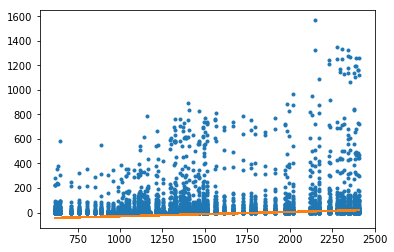

In [23]:
plt.plot(jobs_merge['stock'], jobs_merge['job'], '.', jobs_merge['stock'], jobs_merge['stock']*0.0352-65.0335050326)

Canvas is updated and available in a tab in the default browser.
